COVID19 Data Analysis with Python

In this project, we will attempt to answer the 
Question
Is there any relationship between the spread of corona virus in a country and how happy people are liivng in that country?

This analysis is based on the COVID19 dataset, published by John Hopkins University, which consist of the data related to cumulative number of confirmed cases, per day, in each Country. Also there is another dataset related to world happiness report which is an annuak publication of the UN.
These 2 datasets will be mergedto see if there is any relationship between the spread of the virus in a country and how happy people are, living in that country. 

Lets import the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing COVID19 dataset

In [3]:
corona_dataset_csv = pd.read_csv("covid19_confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Checking the shape of the dataframe

In [4]:
corona_dataset_csv.shape

(266, 104)

Delete columns we will not use

In [6]:
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Aggregating the rows by Country

In [64]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
corona_dataset_aggregated.shape

(187, 101)

Visualize data related to a country for examples China

<AxesSubplot:>

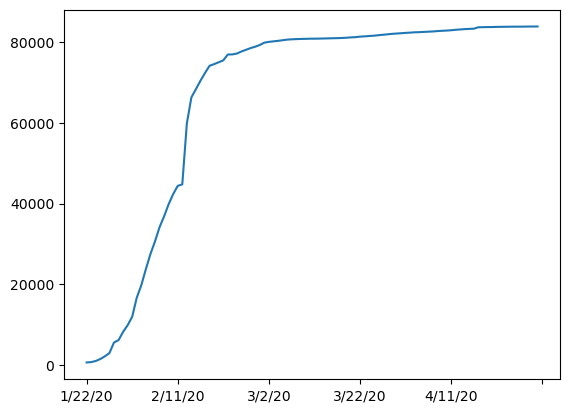

In [44]:
corona_dataset_aggregated.loc["China"].drop(labels = ["Province/State"]).astype(int).plot()

Lets compare 2 countries say China and USA

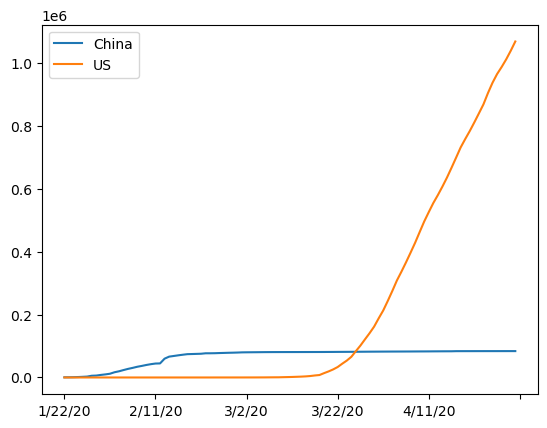

In [56]:
corona_dataset_aggregated.loc["China"].drop(labels = ["Province/State"]).astype(int).plot()
corona_dataset_aggregated.loc["US"].drop(labels = ["Province/State"]).astype(int).plot()
plt.legend()

Visualizing data for first 4 elements for China

<AxesSubplot:>

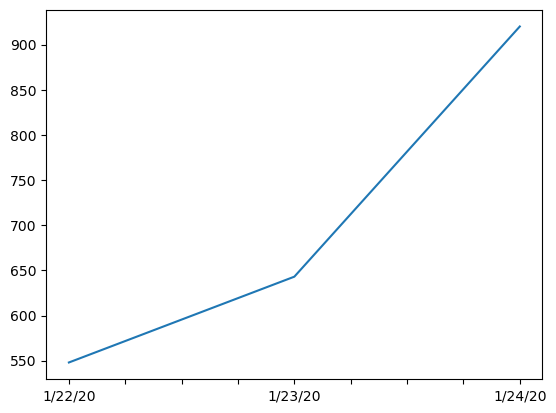

In [54]:
corona_dataset_aggregated.loc["China"][:4].drop(labels = ["Province/State"]).astype(int).plot()

Calculating and plotting the first derivative of the curve

<AxesSubplot:>

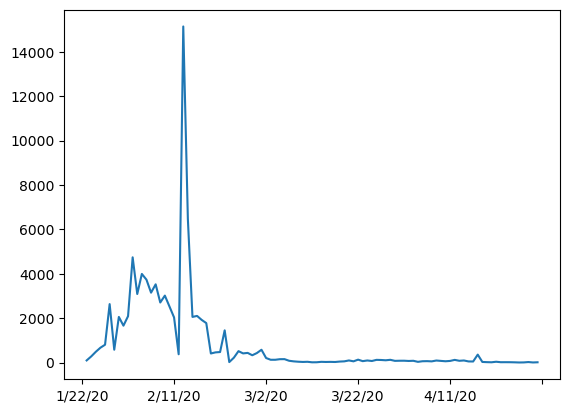

In [59]:
corona_dataset_aggregated.loc["China"].drop(labels = ["Province/State"]).diff().plot()

Plot above shows the change in infection rate day by day in our period

Finf max infection rate for China, US and Russia

In [61]:
corona_dataset_aggregated.loc["China"].drop(labels = ["Province/State"]).diff().max()

15136

In [62]:
corona_dataset_aggregated.loc["US"].drop(labels = ["Province/State"]).diff().max()

36188

In [65]:
corona_dataset_aggregated.loc["Russia"].drop(labels = ["Province/State"]).diff().max()

7099

Find max infection rate for all the countries

In [66]:
countries = corona_dataset_aggregated.index
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].drop(labels = ["Province/State"]).diff().max())
max_infection_rates

[232,
 34,
 199,
 43,
 5,
 6,
 291,
 134,
 497,
 1321,
 105,
 7,
 301,
 641,
 12,
 1485,
 2454,
 4,
 19,
 1,
 104,
 92,
 7,
 7502,
 26,
 137,
 41,
 21,
 6,
 45,
 31,
 203,
 2778,
 31,
 21,
 1138,
 15136,
 353,
 1,
 57,
 81,
 37,
 113,
 96,
 63,
 58,
 381,
 391,
 99,
 156,
 5,
 371,
 11536,
 269,
 32,
 130,
 7,
 134,
 20,
 9,
 5,
 267,
 26849,
 38,
 5,
 42,
 6933,
 403,
 156,
 6,
 68,
 167,
 132,
 12,
 10,
 3,
 72,
 210,
 99,
 1893,
 436,
 3186,
 91,
 1515,
 1131,
 6557,
 52,
 1161,
 40,
 264,
 29,
 851,
 289,
 300,
 69,
 3,
 48,
 61,
 17,
 13,
 21,
 90,
 234,
 7,
 14,
 10,
 235,
 190,
 58,
 52,
 2,
 41,
 1425,
 222,
 12,
 13,
 30,
 281,
 19,
 3,
 14,
 1346,
 89,
 2,
 69,
 208,
 107,
 386,
 144,
 1292,
 357,
 5,
 27,
 3683,
 538,
 545,
 1516,
 957,
 523,
 7099,
 22,
 5,
 6,
 4,
 54,
 6,
 1351,
 87,
 2379,
 2,
 20,
 1426,
 114,
 70,
 73,
 354,
 28,
 9630,
 65,
 67,
 3,
 812,
 1321,
 6,
 27,
 15,
 181,
 188,
 10,
 14,
 40,
 82,
 5138,
 36188,
 11,
 578,
 552,
 8733,
 48,
 167,
 29,
 19,
 

In [67]:
corona_dataset_aggregated["Max_infection_rate"] = max_infection_rates

In [69]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5


Creating a new dataframe with only the needed data

In [70]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rate"])
corona_data.head()

,Max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


-importing the worldhappiness data report

-selecting needed columns for analysis 

-join the datasets 

-calculate the correlations as the result of our analysis

Importing the dataset

In [88]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Drop columns we will not use

In [89]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [90]:
happiness_report_csv.drop(useless_cols, axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


Chaning the indices of the dataframe

In [91]:
happiness_report_csv.set_index("Country or region", inplace = True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Lets join out two datasets

In [92]:
corona_data.head()

,Max_infection_rate
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [93]:
corona_data.shape

(187, 1)

In [94]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [95]:
happiness_report_csv.shape

(156, 4)

In [96]:
data = corona_data.join(happiness_report_csv, how = "inner")
data.head()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


Correlation matrix

In [97]:
data.corr()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


Visualizing the result

In [98]:
data.head()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


Plotting GDP vs max_infection rate

C:\Users\Fo Fonkem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rate'>

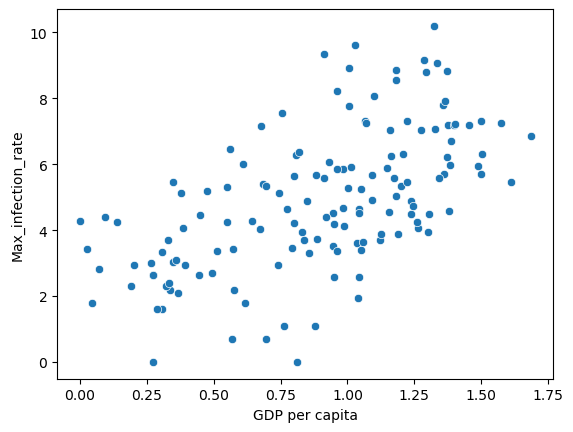

In [101]:
x = data["GDP per capita"]
y = data["Max_infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\Fo Fonkem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rate'>

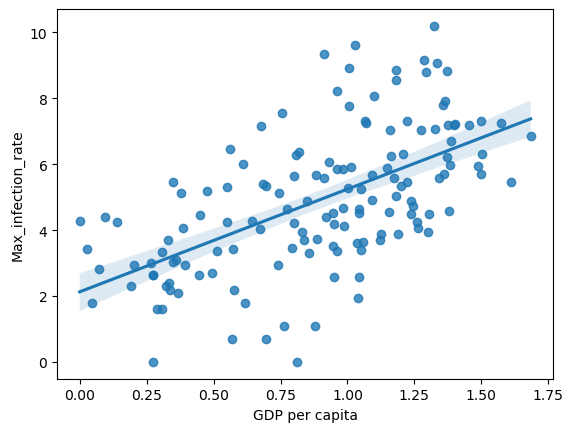

In [102]:
sns.regplot(x,np.log(y))

Plotting social support vs infection rate

C:\Users\Fo Fonkem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_infection_rate'>

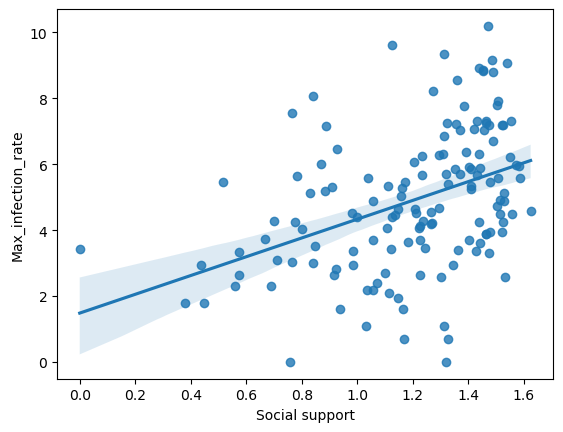

In [104]:
x = data["Social support"]
y = data["Max_infection_rate"]
sns.regplot(x,np.log(y))

Health life expectancy vs max_infection rate

C:\Users\Fo Fonkem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rate'>

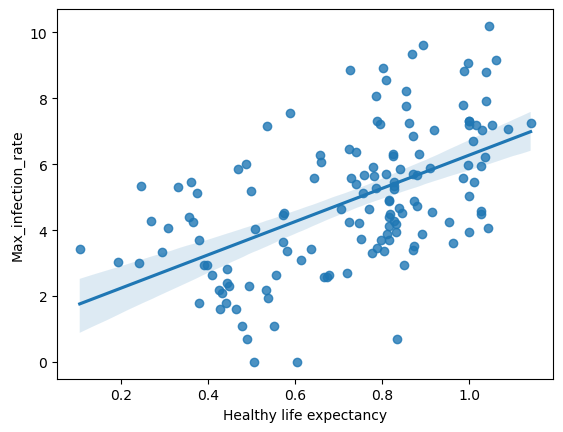

In [105]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rate"]
sns.regplot(x,np.log(y))

Freedom to make life choice vs max_infection rate

C:\Users\Fo Fonkem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_infection_rate'>

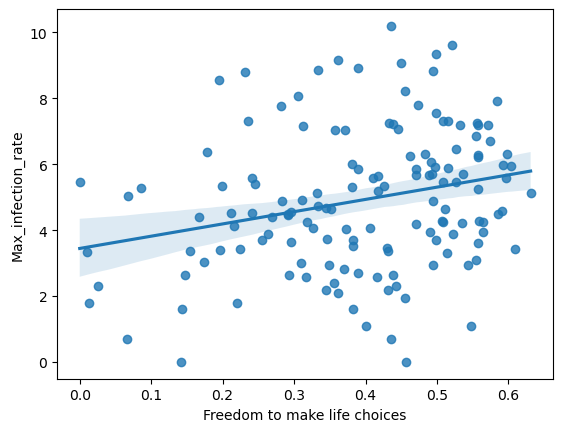

In [106]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rate"]
sns.regplot(x,np.log(y))